# Mustererkennung/Machine Learning - Assignment 1 Solution



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
training_data = np.array(pd.read_csv('Data/zip.train', sep=' ', header=None))
test_data = np.array(pd.read_csv('Data/zip.test', sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

In [ ]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 255 - sample_digits[i].reshape((16, 16))
        plt.imshow(img, cmap='gray')
        plt.axis('off')

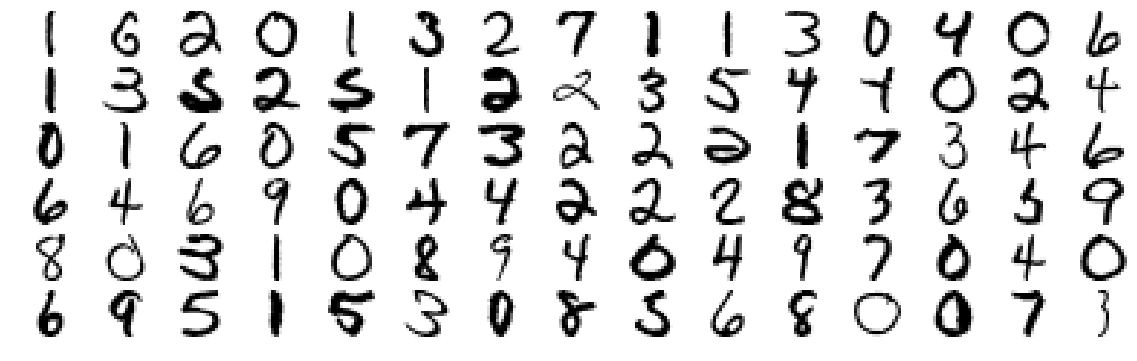

In [ ]:
show_numbers(X_train)

In [ ]:
class Classifier:
    
    def accuracy(self, labels, predictions):
        return np.mean(labels == predictions)
    
    def confusion_matrix(self, labels, predictions):
        size = len(set(labels))
        matrix = np.zeros((size, size))
        for correct, predicted in zip(labels.astype(int), predictions):
            matrix[correct][predicted] += 1
        return matrix

In [ ]:
class KNearestNeighbors(Classifier):
    
    def euclidean_distance(self, x_1, x_2):
        return np.sum((x_1-x_2)**2, axis=1)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X_test, k):
        predictions = []
        for sample in X_test:
            distances = self.euclidean_distance(self.X, sample)
            indices = np.argpartition(distances, k)[:k]
            votes = (self.y[indices]).astype(int)
            winner = np.argmax(np.bincount(votes, minlength = 10))
            predictions += [winner]
        print('Predictions for k=%d complete' %k)
        return predictions

In [ ]:
model = KNearestNeighbors()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions_1 = model.predict(X_test, 1)
predictions_2 = model.predict(X_test, 2)
predictions_3 = model.predict(X_test, 3)

Predictions for k=1 complete
Predictions for k=2 complete
Predictions for k=3 complete


In [ ]:
print(model.accuracy(y_test, predictions_1))
print(model.accuracy(y_test, predictions_2))
print(model.accuracy(y_test, predictions_3))

0.9436970602889886
0.9412057797708022
0.9446935724962631


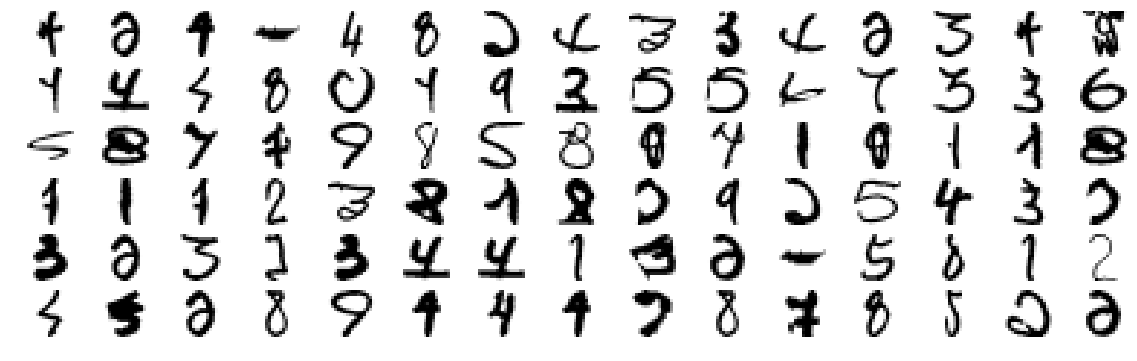

In [ ]:
misclassified = X_test[(predictions_1 != y_test)]
show_numbers(misclassified)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 3+1):
    sklearn_model = KNeighborsClassifier(n_neighbors=k)
    sklearn_model.fit(X_train, y_train)
    print(sklearn_model.score(X_test, y_test))

0.9436970602889886
0.9412057797708022
0.9446935724962631
